In [1]:
import pandas as pd
import numpy as np

In [40]:
# Load Data

x_df = pd.read_csv('cell_painting_modz.tsv', sep = '\t')

# Separate the metadata columns
x_meta = x_df.iloc[:, :3]

# Drop the metadata columns from the original DataFrame
x_df = x_df.iloc[:, 3:]


y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')

y_df = y_all_df.loc[:, ['vb_ros_mean']]

In [42]:
# Model Formation

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [43]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 42)


# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Various Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Elastic Net': ElasticNet(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000),
    'XGBoost Regressor': XGBRegressor(),
    'LightGBM Regressor': LGBMRegressor()
}

# Parameter grids for linear models and tree-based models
linear_param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Support Vector Regression': {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor': {'n_neighbors': [3, 5, 7, 9]},
    'Bayesian Ridge': {},
     'Elastic Net': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
}

tree_param_grids = {
    'Decision Tree Regressor': {'max_depth': [None, 10, 20, 30]},
    'Random Forest Regressor': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Regressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]},
    'XGBoost Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LightGBM Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Result Save
best_models = {}
best_params = {}

# Model Class dict
model_classes = {
    'Ridge Regression': Ridge,
    'Lasso Regression': Lasso,
    'Support Vector Regression': SVR,
    'K-Nearest Neighbors Regressor': KNeighborsRegressor,
    'Decision Tree Regressor': DecisionTreeRegressor,
    'Random Forest Regressor': RandomForestRegressor,
    'Gradient Boosting Regressor': GradientBoostingRegressor,
    'Bayesian Ridge': BayesianRidge,
    'Elastic Net': ElasticNet,
    'AdaBoost Regressor': AdaBoostRegressor,
    'MLP Regressor': MLPRegressor,
    'XGBoost Regressor': XGBRegressor,
    'LightGBM Regressor': LGBMRegressor
}

# GridSearchCV and training loop for linear models
for model_name, param_grid in linear_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')

# GridSearchCV and training loop for tree-based models
for model_name, param_grid in tree_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')

# Output the best parameters for each model
print("Best parameters:")
for model_name, params in best_params.items():
    print(f'{model_name}: {params}')

Ridge Regression Best Parameters: {'alpha': 100.0}
Ridge Regression (After tuning):
  Mean Squared Error = 0.18413994128783484
  Root Mean Squared Error = 0.42911530069182435
  R² Score = 0.2993778681433835

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression (After tuning):
  Mean Squared Error = 0.2592305349615212
  Root Mean Squared Error = 0.5091468697355619
  R² Score = 0.013670533525520279

Support Vector Regression Best Parameters: {'C': 10.0, 'epsilon': 0.1}
Support Vector Regression (After tuning):
  Mean Squared Error = 0.19136303450722247
  Root Mean Squared Error = 0.4374506080773262
  R² Score = 0.27189518874980234

K-Nearest Neighbors Regressor Best Parameters: {'n_neighbors': 3}
K-Nearest Neighbors Regressor (After tuning):
  Mean Squared Error = 0.26854272251032885
  Root Mean Squared Error = 0.5182110791080492
  R² Score = -0.021760805525988802

Bayesian Ridge Best Parameters: {}
Bayesian Ridge (After tuning):
  Mean Squared Error = 0.19603771832765396
  

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+00, tolerance: 1.990e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.118e-01, tolerance: 1.231e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.936e-01, tolerance: 

Elastic Net Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Elastic Net (After tuning):
  Mean Squared Error = 0.19107334931080408
  Root Mean Squared Error = 0.4371193764989194
  R² Score = 0.27299739318444316

Decision Tree Regressor Best Parameters: {'max_depth': 20}
Decision Tree Regressor (After tuning):
  Mean Squared Error = 0.47133438929911264
  Root Mean Squared Error = 0.6865379736759742
  R² Score = -0.7933496792631871

Random Forest Regressor Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Random Forest Regressor (After tuning):
  Mean Squared Error = 0.24277443943401295
  Root Mean Squared Error = 0.49272146232330183
  R² Score = 0.07628326517887107

Gradient Boosting Regressor Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Gradient Boosting Regressor (After tuning):
  Mean Squared Error = 0.23044724414915863
  Root Mean Squared Error = 0.48004921013283486
  R² Score = 0.12318621181762979

AdaBoost Regressor Best Parameters: {'learning_rate': 0.01, 

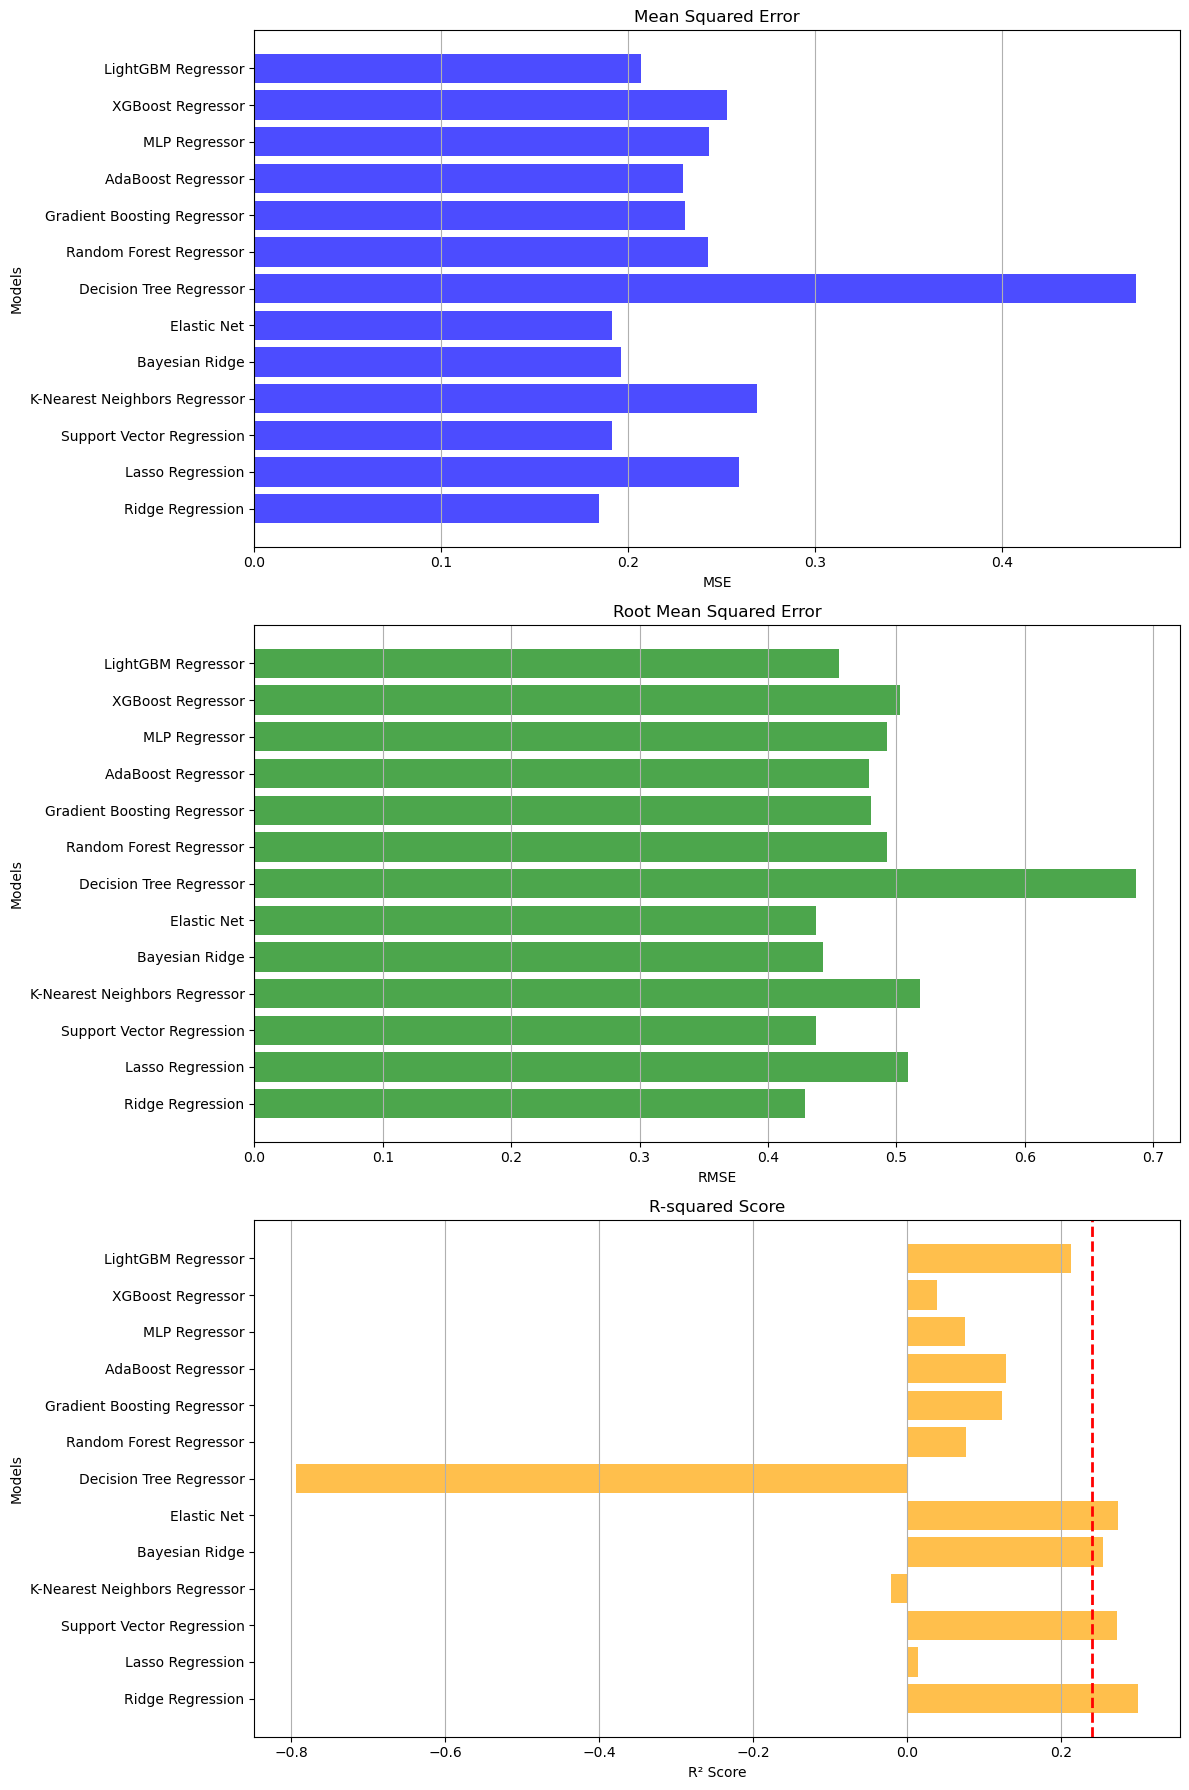

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Evaluate and collect scores for each model
for model_name, model in best_models.items():
    # Make predictions on the test data using the already trained model
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store scores and model names
    model_names.append(model_name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Plotting the scores
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Mean Squared Error plot
ax1.barh(model_names, mse_scores, color='blue', alpha=0.7)
ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.set_ylabel('Models')
ax1.xaxis.grid(True)

# Root Mean Squared Error plot
ax2.barh(model_names, rmse_scores, color='green', alpha=0.7)
ax2.set_title('Root Mean Squared Error')
ax2.set_xlabel('RMSE')
ax2.set_ylabel('Models')
ax2.xaxis.grid(True)

# R-squared plot
ax3.barh(model_names, r2_scores, color='orange', alpha=0.7)
ax3.set_title('R-squared Score')
ax3.set_xlabel('R² Score')
ax3.set_ylabel('Models')
ax3.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax3.xaxis.grid(True)

plt.tight_layout()
plt.savefig('accuracy_results.png')
plt.show()


In [17]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet, HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Existing best models from GridSearchCV
best_models = {
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Support Vector Regression': SVR(C=1.0, epsilon=0.1),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=None),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=300, max_depth=None),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=300, learning_rate=0.1),
    'Bayesian Ridge': BayesianRidge(),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=200, learning_rate=0.1),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=1000),
    'XGBoost Regressor': XGBRegressor(n_estimators=200, learning_rate=0.1),
    'LightGBM Regressor': LGBMRegressor(n_estimators=200, learning_rate=0.1)
}

# Additional models to consider
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
huber_regressor = HuberRegressor()
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)

# Combine all models into a list of estimators for VotingRegressor
all_estimators = [
    ('ridge', best_models['Ridge Regression']),
    ('lasso', best_models['Lasso Regression']),
    ('svr', best_models['Support Vector Regression']),
    ('knn', best_models['K-Nearest Neighbors Regressor']),
    ('decision_tree', best_models['Decision Tree Regressor']),
    ('random_forest', best_models['Random Forest Regressor']),
    ('gradient_boosting', best_models['Gradient Boosting Regressor']),
    ('bayesian_ridge', best_models['Bayesian Ridge']),
    ('adaboost', best_models['AdaBoost Regressor']),
    ('mlp', best_models['MLP Regressor']),
    ('xgb', best_models['XGBoost Regressor']),
    ('lgbm', best_models['LightGBM Regressor']),
    ('elastic_net', elastic_net),
    ('huber', huber_regressor),
    ('extra_trees', extra_trees_regressor)
]

# Ensemble Model with VotingRegressor
voting_regressor = VotingRegressor(estimators=all_estimators)

# Model Fit
voting_regressor.fit(X_train, y_train)

# Model Assessment
y_pred = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Voting Regressor (Using best models from GridSearchCV plus additional models):')
print(f'  Mean Squared Error = {mse}')
print(f'  Root Mean Squared Error = {rmse}')
print(f'  R² Score = {r2}\n')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91104
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 949
[LightGBM] [Info] Start training from score 0.045367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Voting Regressor (Using best models from GridSearchCV plus additional models):
  Mean Squared Error = 0.18577758000087086
  Root Mean Squared Error = 0.4310192339105888
  R² Score = 0.2931469227096346

